In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from scipy.stats import t
from matplotlib.colors import ListedColormap
from scipy import stats

# Linear Regression 

We start by building a dataset (X,Y) with 50 samples, using the linear function f and add noise using np.random.normal(0,sigma):

In [2]:
def f(x,theta):
    x_temp = np.array([1.0,x])
    return np.dot(x_temp,theta)

In [5]:
sigma = 25
n =50                          #hier stond initieel n=5
x = np.linspace(0,100,n)

#our linear model is defined by beta:
beta = [3.0,1.5]

#a more compact way of coding this: 
y = np.array([ f(x[kk],beta) + np.random.normal(0,sigma) for kk in range(len(x))])
#test with random data:
#y = np.array([ np.random.random() for kk in range(len(x))])  

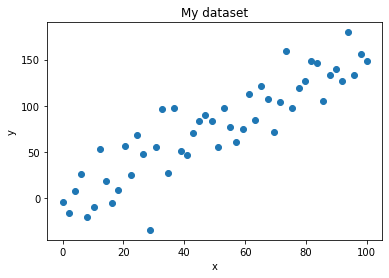

In [6]:
plt.title('My dataset')
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<b> (a) Estimate the $\beta_0$ and $\beta_1$ from this dataset using MSE minimination (formula on slide 20):

python hints: 

to build the matrix X for x, you might have to "force" it to be a np.array: to convert a list xx to a np.array, use xx = np.array(xx). 

to invert a matrix, use np.linalg.inv. 

for matricial product, use np.dot(,)

(5, 2)

the estimation of the slope is  1.7361474847139053 the estimation of the intercept is  -21.488178897684556


<b> (b) Estimate sigma from the dataset:

The estimated value of sigma is  33.54462647011179 , the true value is  25


The error made on estimating the sigma is  0.4243096916205095 (to be compared with the value of sigma)


<b> (c) Compute the p value associate with this linear regression and explain what it represents. 
=> you need first to compute $z$, and then compute what is the probability of having observed a $z$ with that value of higher (in absolute valeu). 

Then compute $z_1$ as on slide 28 to get the boundary value of $z$ for acceptance or rejection of the null hypothesis. </b>


hint: you need to estimate the value of sigma from the dataset for this, and rely on formula for $z$ on slide 27

hint 2: use the following functions

t.pdf(...,df) = Probability Density Function (PDF): Returns the probability for an observation having a specific value from the distribution (df = number of degrees of freedom of the t distribution).

t.cdf(...,df) = Cumulative Density Function (CDF): Returns the probability for an observation equal to or lesser than a specific value from the distribution.

t.ppf(..., df) = Percent Point Function (PPF): Returns the observation value for the provided probability that is less than or equal to the provided probability from the distribution.

0.4243096916205095

4.09169886759661

0.9868045774765658

In [122]:
#this is the p-value: 
2*(1-t.cdf(np.abs(myz), df)) #probability of observing something bigger than myz:

0.026390845046868394

In [123]:
#the probability of observing any number equal to |t| or larger in absolute value, assuming β1 = 0. 
#We call this probability the p-value.
p_value = 2*(t.cdf(-np.abs(myz),df))
p_value*100

2.639084504686833

If it is less than 5 percent, I reject my null hypothesis and I claim that there is a linear relationship between $x$ and $y$. 
The quality of the fit is given by (see slide 29):

0.6101791557488742

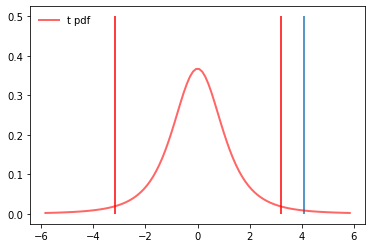

In [126]:
fig, ax = plt.subplots(1, 1)
df = n-2
#mean, var, skew, kurt = t.stats(df, moments='mvsk')

x_fig = np.linspace(t.ppf(0.005, df),t.ppf(0.995, df), 100)

ax.plot(x_fig, t.pdf(x_fig, df),'r-', lw=2, alpha=0.6, label='t pdf')
ax.vlines(myz,ymin=0,ymax=.5 )
ax.vlines(max_z,colors='r',ymin=0,ymax=.5)
ax.vlines(min_z,colors='r',ymin=0,ymax=.5)

ax.legend(loc='upper left', frameon=False)

plt.show()

If the blue line is far from the peak of the distribution (futher than the red lines), it is very unlikely to observe that "z-value" under the null hypothesis => we reject it and accept the fact that there is a linear relation between x and y. 

In [128]:
# here is how to do this with a black box: 
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(p_value)

0.026390845046868235


(d) check the $z_{min}$ and $z_{max}$ values (cf slide 28) by integrating the probability distribution => it should give 0.95 (answer is provided because it is a bit technical): 

In [129]:
import scipy.integrate as integrate

from scipy.integrate import quad

def integrand(x, df):

    return t.pdf(x, df)

I = quad(integrand, min_z, max_z, args=(df))

I

(0.950000000000021, 1.4104794068825477e-10)

(e) Repeat (a) 10 times for different dataset (to be build similarly as above) and represent the obtained $\hat \beta_1$ with an histogram 

In [147]:
number_of_iterations = 100
beta1_evaluations = np.zeros(number_of_iterations)
beta1_evaluations_over_sigma = np.zeros(number_of_iterations)
sigma_evaluations = np.zeros(number_of_iterations)
for kk in range(number_of_iterations):
    y = 
    betas=
    beta1_evaluations[kk] = betas[1]
    sigma_evaluations[kk] = 
    beta1_evaluations_over_sigma[kk] = betas[1]/sigma_evaluations[kk] 

11.418982539847754 0.7396723515746613 2.141798596848809


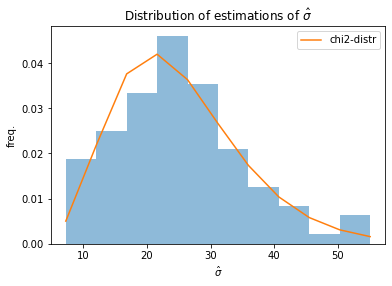

In [207]:
#this should be a chi-2 distribution with n-p dof (code already written)
_, bins_S, _ =plt.hist(sigma_evaluations, density=1, alpha=0.5)
aa, bb, cc = stats.chi2.fit(sigma_evaluations)
plt.title('Distribution of estimations of $\hat{\sigma}$')
print(aa, bb, cc)
best_fit_line_chi2 = stats.chi2.pdf(bins_S,aa, bb, cc )
plt.plot(bins_S,best_fit_line_chi2,label='chi2-distr')
plt.xlabel('$\hat{\sigma}$')
plt.ylabel('freq.')
plt.legend()
plt.show()

Extra: would be nice to test if the distribution fits indeed well a chi2! (which visually looks to be the case)
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

Indeed, the p-value is lower than our threshold of 0.05, so we reject the null hypothesis in favor of the default “two-sided” alternative: the data are not distributed according to the standard normal.

0.07193923917415 0.03877072493268553


In [209]:
beta1_evaluations= 

(e) What is the probability distriubtion of the estimated values $\hat \beta_1 / \sigma_{\beta_1}$. Comment the figure obtained with the code below:

The value of n -2 is  3  and n/(n-2) is  1.6666666666666667


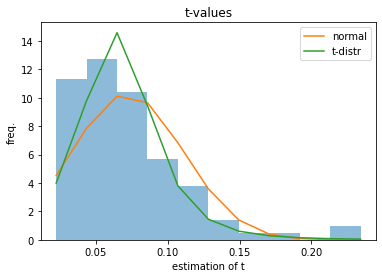

In [210]:
#fit to normal and t distributions
mu_normal_fit, sigma_normal_fit = stats.norm.fit(beta1_evaluations_over_sigma)
df_est, loc_est, scale_est = t.fit(beta1_evaluations_over_sigma)

#getting the bins
_, bins, _ = plt.hist(beta1_evaluations_over_sigma, density=1, alpha=0.5)

#getting normal and t distributions curves
best_fit_line = stats.norm.pdf(bins, mu_normal_fit, sigma_normal_fit)
best_fit_line_t = stats.t.pdf(bins,df_est, loc_est, scale_est)

plt.plot(bins, best_fit_line,label='normal')
plt.plot(bins,best_fit_line_t,label='t-distr')
plt.title('t-values')
plt.xlabel('estimation of t')
plt.ylabel('freq.')
plt.legend()
plt.show()

# Exercise: Linear discriminant analysis: pink vs green

We start with a labelled data set whose inputs are : 

In [4]:
X = np.array([1.75860969,  1.21822739, -1.26356318,  2.91537812,  3.10517506,
        3.08995169,  1.73663264,  1.417986  ,  2.97874194,  1.02612401,
        1.44476555,  0.57531973,  0.26809148,  4.09974131,  2.50400378,
        2.99089042,  0.57560659,  1.82877472,  1.4679634 ,  2.43664457,
        1.97868673, -0.80911347,  1.55322051,  1.24100934,  2.39248028,
        3.83483408,  3.1876462 ,  3.55671585,  1.38558747,  3.30074664,
        2.75590294,  2.32096285,  2.85548297,  2.32616711, -1.57455353,
        2.4311101 ,  2.55119646,  2.90450118,  2.00737857,  0.01656822,-1.19331961,  0.68029264, -1.40977742, -1.57572063, -2.65345905,
       -2.16083126,  0.8167179 ,  0.05211783, -3.24852015, -2.09097824,
       -1.77366778, -1.38219704, -3.38111373, -5.17816507, -0.97002885,
       -2.03895265, -0.99034122,  0.39721913, -0.08746797, -2.97716289,
       -4.69607405, -3.19356515, -0.90374167, -2.6196549 ,  0.2500216 ,
       -3.35646837, -1.59124805,  0.04690309, -4.48707835, -2.65187787,
       -1.30699669, -3.7194796 , -2.50237985, -1.19258543, -1.77802654,
       -2.4663718 , -0.64556797, -1.3099631 , -3.26836737,  1.89202167])

In [5]:
X.shape

(80,)

and outputs (here all pink outputs are listed first) :

In [6]:
Y = np.array(['pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green'])

In [7]:
Y.shape

(80,)

Define an array containing only the 'pink' inputs and one containing only the 'green'inputs:

In [8]:
pink_indices = np.where(Y=='pink')[0]
pink = X[pink_indices]
green_indices = np.where(Y=='green')[0]
green = X[green_indices]

## Coding a LDA 

Our goal will be to perform a linear discriminant analysis. In the case of two categories (as here with the pink and green categories), this amounts to find the boundary of decision $x^\star$. If the input $x$ is larger than $x^\star$ it belongs to the category for which the mean value of $x$ is larger, and if $x$ is smaller than $x^\star$ it belongs to the other category. 

REM: we can also decide to focuss on only one category, let say the pink category, and decide to assign a sample to this category if if the probability of belonging to this category is higher than 60% for instance (instead of the more "natural" choice of 50 %) => this amounts to change the threshold. 

Here we want to evaluate 

$p_{\text{green}} (x)$ and 

$p_{\text{pink}} (x)$.


We can use the formula: 

$p_k(x) = \frac{ \frac{\pi_k}{\sqrt{2 \pi }\sigma} \exp{(- \frac{1}{2 \sigma^2}(x - \mu_k)^2 )} }{N} $   (with $k =$ pink, green)

if we have estimations for $\pi_k$, $\mu_k$ and $\sigma$. $N$ is a normalisation factor. 



<b> Estimate of the means for both categories: 

In [9]:
mu_p_hat=
mu_g_hat=
print('Mean value of pink samples is ',mu_p_hat,'and of green samples ', mu_g_hat)
1.5**2


Mean value of pink samples is  1.9097898852500002 and of green samples  -1.7666464115


2.25

Clearly, samples with a value close to 2 will be more likely to be pink and samples with a value close to -1.5 will be more likely to be green. 

<b> Estimate sigma for the whole data set (see slides):

$\hat \sigma^2  = \frac{1}{n-K} \sum_k \sum_i (x_i - \hat \mu_k)^2$ 

where $K$ is the number of categories (here 2), the first sum is over catergories and the second over the samples within the given category: 

$\hat \sigma^2  = \frac{1}{n-2} ( \sum_{i \text{ for pink samples}} (x_i - \hat \mu_p)^2 \, + \, \sum_{i \text{ for green samples}} (x_i - \hat \mu_g)^2)$ 


In [10]:
pink_normalized = 
green_normalized = 

sigma_hat_2 = 
sigma_hat_2

2.112184851490507

<b> Estimate $\pi_{\text{green}}$ and $\pi_{\text{pink}}$ (this is easy, it is simply the fractions of green and pink samples): 

In [12]:
pi_green = 
pi_pink = 

In [13]:
print(pi_pink,pi_green)

0.5 0.5


<b> Find the boundary value $x^\star$ for decision. You need to solve (by hand) the equation $\delta_{\text{pink}}(x^\star) = \delta_{\text{green}}(x^\star)$ (see slide 19):  


$\delta_k (x) =  x \, \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \, \sigma^2} + \log{(\pi_k)} $


In the present case, we want to have $\pi_{\text{green}} = \pi_{\text{pink}}$ and the equation $\delta_{\text{pink}}(x^\star) = \delta_{\text{green}}(x^\star)$ reads

$ x^\star \, \frac{\mu_{\text{pink}}}{\sigma^2} - \frac{\mu_{\text{pink}}^2}{2 \, \sigma^2} + \log{(\pi_{\text{pink}})} = x^\star \, \frac{\mu_{\text{green}}}{\sigma^2} - \frac{\mu_{\text{green}}^2}{2 \, \sigma^2} + \log{(\pi_{\text{green}})} $

and gets actually very simple, 
 
 $ x^\star \, \mu_{\text{pink}} - \frac{\mu_{\text{pink}}^2}{2 }  = x^\star \, \mu_{\text{green}} - \frac{\mu_{\text{green}}^2}{2}  $.
 
 We deduce that
 
 $x^\star = \frac{\mu_{\text{pink}}^2 - \mu_{\text{green}}^2}{ 2 \, (\mu_{\text{pink}}-\mu_{\text{green}})}$


In [14]:
#writing delta_pink = delta_green gives us the boundary value for an new observation 
#to be classified as green or pink 

x_boundary = 
x_boundary

0.07157173687500006

<b> Plot the histogram (just need to have defined x_boundary and the plotting will work):

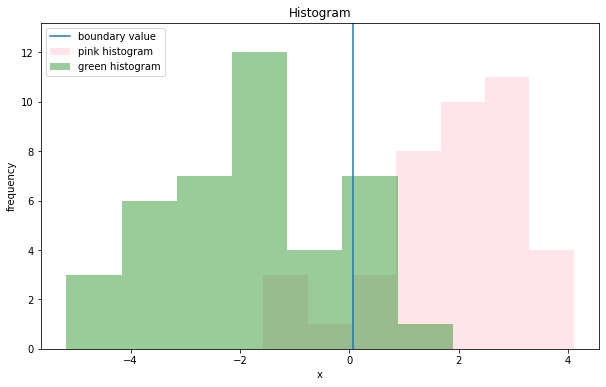

In [15]:
rng = np.random.RandomState(10)  # deterministic random data
bins=np.linspace(-20,20,100)
bins=np.append(bins,np.max([np.max(pink),np.max(green)]))
a = np.hstack((pink,green))
plt.figure(figsize=(10,6))
plt.ylim(top=np.max(bins))
y1, x1,_ = plt.hist(pink, bins='auto',alpha=.4,color='pink',label='pink histogram')  # alpha level => transparent color (in case histog. overlap)
y2, x2,_ = plt.hist(green,bins='auto',alpha=.4,color='green',label='green histogram')
plt.ylim([0,1.1*np.max(np.array([y1,y2]))])
plt.axvline(x_boundary,label='boundary value')
plt.title("Histogram")
plt.xlabel('x')
plt.ylabel('frequency')
plt.legend(loc='upper left')
plt.show()

If you have a new input $x$ for which we do not know the catergory, the LDA will assign this new input to the pink categroy if $x$ is bigger than $x^\star$ and to the green one if $x$ is smaller than $x^\star$ (for a threshold of 50%). 

<b> For information: the dataset has been generated with the following code</b>

In [15]:
if False:  #I put this "if False" not to generate a new dataset
    mu_p = 2
    mu_g = -2
    sigma = 1.5
    number_points = 40
    pink = np.random.normal(mu_p,sigma,number_points)
    green = np.random.normal(mu_g,sigma,number_points)
    n = 2*number_points

The actual "input" data X is given by the pink and green arrays. Here we have drawn inputs for the two categries (pink and green) from gaussian distributions with the same variance but different means. This actually corresponds to the hypothesis we make in the LDA, i.e. we assume that inside each category, samples are gaussianly distributed. We could define it as: 

In [16]:
if False:
    X=np.concatenate((green,pink),axis=0)

The "output" vector y is then y = ('green', 'green', ... , 'pink','pink') with 40 x 'green' and 40 x 'pink'. We could also assign an integer to each category. Let's say that 'green' = 0 and 'pink' = 1 for instance. Then y = (0,0,...,1,1,...). 


## Assessing the training error 

Using the threshold value of x we computed, we can see to which category all samples would be assigned. 

In [16]:
# all 'green' elements in our labelled data set have the following "x" values: 
green

array([-1.19331961,  0.68029264, -1.40977742, -1.57572063, -2.65345905,
       -2.16083126,  0.8167179 ,  0.05211783, -3.24852015, -2.09097824,
       -1.77366778, -1.38219704, -3.38111373, -5.17816507, -0.97002885,
       -2.03895265, -0.99034122,  0.39721913, -0.08746797, -2.97716289,
       -4.69607405, -3.19356515, -0.90374167, -2.6196549 ,  0.2500216 ,
       -3.35646837, -1.59124805,  0.04690309, -4.48707835, -2.65187787,
       -1.30699669, -3.7194796 , -2.50237985, -1.19258543, -1.77802654,
       -2.4663718 , -0.64556797, -1.3099631 , -3.26836737,  1.89202167])

Let us look which of those would been correctly assigned with our obtained threshold: (use green < x_boundary and np.sum), this is the true positive rate:

35


Similarly, we will have the following number of correclty classified pink samples:

36

Let us focus on the pink category. We can compute the 

- true positive rate : number of correclty classified pink samples. 
- false positive rate : number of samples classified as pink while they are green. 



In [19]:
true_positive_rate = 
print('true positive rate is ',true_positive_rate)

false_positive_rate = 
print('false positive rate is ',false_positive_rate)

true positive rate is  0.9
false positive rate is  0.125



<b> Do a ROC figure.</b>

Let us focus on the pink category. The typical choice is to assign an input $x$ to the pink category is if p_pink(x)>.5. 

However we could choose to be more or less 'cautious' and decide to assign $x$ to the pink category if p_pink(x) > .1,.2,.3,.4,.5,.6,..

For this, we need to evaluate 

$$p_k(x) = \frac{ \frac{\pi_k}{\sqrt{2 \pi} \sigma} \exp{(- \frac{1}{2 \sigma^2}(x - \mu_k)^2 )} }{N} $$

We can first compute the "not normalize $p_k(x)$": 


In [21]:
p_pink_notnorm = 
p_green_notnorm =  

In [22]:
mu_p_hat

1.9097898852500002

In [23]:
mu_g_hat

-1.7666464115

Compute the normalisation factor $N$ for each input:

In [24]:
N_hat = [p_pink_notnorm[kk]+p_green_notnorm[kk] for kk in range(len(X))]

Compute the p_pink and p_green

In [ ]:
p_pink = [p_pink_notnorm[kk]/N_hat[kk] for kk in range(len(X))]
p_green = [p_green_notnorm[kk]/N_hat[kk] for kk in range(len(X))]


In [26]:
#check normalisation
#[p_pink[k]+p_green[k] for k in range(len(X))]

In [27]:
number_of_pink = len(pink)
p_pink_for_true_pink = [p_pink[pink_indices[kk]] for kk in range(len(pink_indices))]
p_pink_for_not_pink = [p_pink[green_indices[kk]] for kk in range(len(green_indices))]


In [28]:
list_threshold = np.array([.1,.2,.3,.4,.5,.6,.7,.8,.9])

#we define arrays filled with zeros where we will store our results
tpr = np.zeros(len(list_threshold))
fpr = np.zeros(len(list_threshold))

for k in range(len(list_threshold)):
    #compute threshold value
    #compute TPR and store value
    threshold = 
    tpr[k]=
    #compute FPR
    fpr[k]=
#

print(np.array([list_threshold,tpr,fpr]))



[[0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9  ]
 [0.95  0.925 0.925 0.925 0.9   0.875 0.875 0.825 0.75 ]
 [0.3   0.225 0.2   0.2   0.125 0.1   0.075 0.025 0.025]]


(-0.05, 1.05)

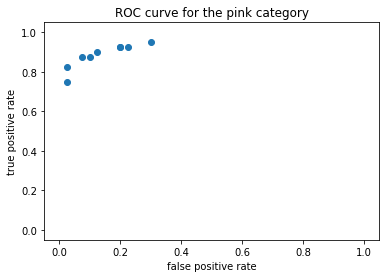

In [29]:
plt.title('ROC curve for the pink category')
plt.scatter(fpr,tpr)
plt.ylabel('true positive rate')
plt.xlabel('false positive rate')
plt.xlim((-0.05,1.05))
plt.ylim((-0.05,1.05))

Let make the graph a bit nicer by labelling each dot:

In [30]:

colours  = ListedColormap(['r','b','yellow','cyan','pink','purple','black','grey','green'])
classes = [str(list_threshold[k]) for k in range(len(list_threshold))]
values = list_threshold

(-0.05, 1.05)

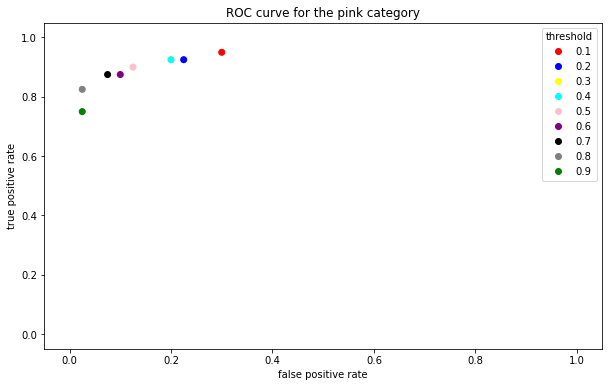

In [31]:
plt.figure(figsize=(10,6))
plt.title('ROC curve for the pink category')
scatter = plt.scatter(fpr,tpr,c=values,cmap=colours)
plt.legend(handles=scatter.legend_elements()[0], labels=classes,title='threshold')
plt.ylabel('true positive rate')
plt.xlabel('false positive rate')
plt.xlim((-0.05,1.05))
plt.ylim((-0.05,1.05))

Is LDA a good classifier?

## Black box - just for your information

Before starting, we need to deal with a little detail coming from the manner the black box "LDA" is working. 
To perform a LDA with the backbox from the sklearn package, we need to have our input matrix encoded in a numpy array with shape $(n,p)$ where $n$ is the number of samples and $p$ the number of features. 

Let us print the shape of X:

In [32]:
X.shape

(80,)

Because it is a 1d dataset (ie, only one input per sample), python makes the shape of the input to be of the form  ($n$,) but we want ($n$,1). Therefore we define a new matrix with the "good" shape

In [33]:
Xrs = X.reshape(-1,1) #this imposes that the last dimension (labelled -1) is 1. 
Xrs.shape

(80, 1)

Use 

clf = LDA() 

clf.fit(Xrs, y) 


In [34]:
# let's declare we will make a linear discriminant analysis: 
clf = LDA(store_covariance=True) #I could have used clf = LDA() with no option 
# let's perform the linear discriminant analysis: 
clf.fit(Xrs,Y) 

LinearDiscriminantAnalysis(store_covariance=True)

and then the function clf.predict to predict the category of a new input (what you need to define): 


In [35]:
Yhat = clf.predict(Xrs)

In [36]:
clf.classes_

array(['green', 'pink'], dtype='<U5')

Compare predictions with true outputs (for shake of visibility I look only at the first 10 samples)

In [37]:
print(Y[0:10])
print(Yhat[0:10])

['pink' 'pink' 'pink' 'pink' 'pink' 'pink' 'pink' 'pink' 'pink' 'pink']
['pink' 'pink' 'green' 'pink' 'pink' 'pink' 'pink' 'pink' 'pink' 'pink']


Let us focus on the pink category. We can compute the 

- true positive rate : number of correclty classified pink samples. 
- false positive rate : number of samples classified as pink while they are green. 

=> we will do this for different threshold values and obtain a ROC curve. 

<b> Do a ROC figure.</b>

Let us focus on the pink category. The typical choice is to assign an input $x$ to the pink category is if p_pink(x)>.5. 

However we could choose to be more or less 'cautious' and decide to assign $x$ to the pink category if p_pink(x) > .1,.2,.3,.4,.5,.6,..

For this, we need to evaluate $p_k(x)$ for $k=$ pink:

$$p_{\text{pink}}(x) = \frac{ \frac{\pi_{\text{pink}}}{\sqrt{2 \pi} \sigma} \exp{(- \frac{1}{2 \sigma^2}(x - \mu_{\text{pink}})^2 )} }{N} $$

For this we can use 

hat_pi_s = clf.predict_proba(Xrs)

hat_pi_s is the matrix containing $p_k(x)$ for all samples in Xrs and for $k=$ pink and green, it is an $n \times 2$ matrix. 

In [38]:
hat_pi_s = clf.predict_proba(Xrs)
print(hat_pi_s.shape)
hat_pi_s[0:10,:]

(80, 2)


array([[0.0503817 , 0.9496183 ],
       [0.11963922, 0.88036078],
       [0.91083841, 0.08916159],
       [0.00703439, 0.99296561],
       [0.0050654 , 0.9949346 ],
       [0.00520071, 0.99479929],
       [0.05224364, 0.94775636],
       [0.08757999, 0.91242001],
       [0.00630445, 0.99369555],
       [0.15956357, 0.84043643]])

Since each sample should be either pink or green, we have that:

In [39]:
print('for the sample 0, we can sum it\'s probability of being pink and green hat_pi_s[0,0]+hat_pi_s[0,1] and check that it is ',hat_pi_s[0,0]+hat_pi_s[0,1])

print('for all samples, this is true')
np.sum(hat_pi_s,axis=1)


for the sample 0, we can sum it's probability of being pink and green hat_pi_s[0,0]+hat_pi_s[0,1] and check that it is  1.0
for all samples, this is true


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Use the information in hat_pi_s to redo a ROC curve for the pink category. 

In [40]:
#I cut-paste the code for dthe ROC curve above (and add _bb for black box) : 


list_threshold = np.array([.1,.2,.3,.4,.5,.6,.7,.8,.9])

p_pink_bb = hat_pi_s[:,1]
#we define arrays filled with zeros where we will store our results (bb is for black box)
tpr_bb = np.zeros(len(list_threshold))
fpr_bb = np.zeros(len(list_threshold))
number_of_pink = len(pink)

p_pink_for_true_pink_bb = [p_pink_bb[pink_indices[kk]] for kk in range(len(pink_indices))]
p_pink_for_not_pink_bb = [p_pink_bb[green_indices[kk]] for kk in range(len(green_indices))]



In [41]:
# we can see that the proba of being pink for pink samples is typically high (the thrid sample will be misclassified): 
p_pink_for_true_pink_bb[0:10]

[0.9496183037330007,
 0.8803607816051873,
 0.08916158750624673,
 0.9929656125833335,
 0.9949345956875953,
 0.9947992881209194,
 0.947756358068765,
 0.9124200080665845,
 0.9936955523182874,
 0.8404364317406253]

[[0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9  ]
 [0.95  0.925 0.925 0.925 0.9   0.875 0.875 0.825 0.75 ]
 [0.3   0.225 0.2   0.2   0.125 0.1   0.075 0.025 0.025]]


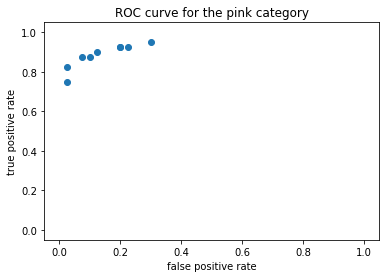

In [42]:
list_threshold = np.array([.1,.2,.3,.4,.5,.6,.7,.8,.9])


for k in range(len(list_threshold)):
    #compute threshold value
    threshold = list_threshold[k]
    #compute True Positive Rate and store value (among the true pink, how many have been correctly identify?)
    tpr_bb[k]=np.sum(p_pink_for_true_pink_bb>threshold)/len(pink_indices)
    #compute False Postive Rate and store values (among the true green, how many have been identified as pink?)
    fpr_bb[k]=np.sum(p_pink_for_not_pink_bb>threshold)/len(green_indices)

print(np.array([list_threshold,tpr_bb,fpr_bb]))

plt.title('ROC curve for the pink category')
plt.scatter(fpr_bb,tpr_bb)
plt.ylabel('true positive rate')
plt.xlabel('false positive rate')
plt.xlim((-0.05,1.05))
plt.ylim((-0.05,1.05))
plt.show()

In [43]:

print('estimation of the covariance with the black box ',clf.covariance_)
print('estimation of the pi_k with the black box ', clf.priors_)
print('estimation of the means with the black box ',clf.means_)


estimation of the covariance with the black box  [[2.05938023]]
estimation of the pi_k with the black box  [0.5 0.5]
estimation of the means with the black box  [[-1.76664641]
 [ 1.90978989]]


(-0.05, 1.05)

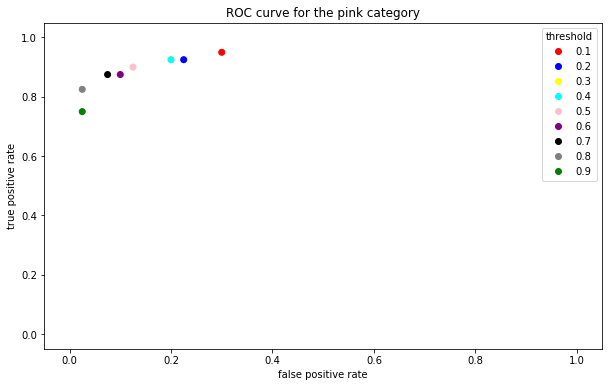

In [44]:
#one color per threshold value
colours  = ListedColormap(['r','b','yellow','cyan','pink','purple','black','grey','green'])
#labels for the legend (values of the thresholds)
classes = [str(list_threshold[k]) for k in range(len(list_threshold))]
values = list_threshold

plt.figure(figsize=(10,6))
plt.title('ROC curve for the pink category')
scatter = plt.scatter(fpr_bb,tpr_bb,c=values,cmap=colours)

plt.legend(handles=scatter.legend_elements()[0], labels=classes,title='threshold')
plt.ylabel('true positive rate')
plt.xlabel('false positive rate')
plt.xlim((-0.05,1.05))
plt.ylim((-0.05,1.05))

# Example of black box LDA with 2d dataset - just for your information

In [118]:
# Here I take a "small dataset" with 6 samples for which two features have been measured: 
X_example = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
print('shape of X ',X_example.shape)
# and provide the "outputs" for those 6 samples (category 0 or category 1)
y_example = np.array([0, 0, 0, 1, 1, 1])
print('shape of y ', y_example.shape)
# I perform LDA:
clf = LDA()
clf.fit(X_example, y_example)
#example of prediction for new inputs:
print('prediction of class for the two new inputs [-.3, -1], [2, -1]] : ', clf.predict(np.array([[-.3, -1], [2, -1]])))

#prediction for X:
print('prediction for on the six samples (training set)', clf.predict(X_example))

print('everything was correctly classified, indeed the true outputs are :', y_example)

shape of X  (6, 2)
shape of y  (6,)
prediction of class for the two new inputs [-.3, -1], [2, -1]] :  [0 0]
prediction for on the six samples (training set) [0 0 0 1 1 1]
everything was correctly classified, indeed the true outputs are : [0 0 0 1 1 1]


# Exercise: The simplest neural network ever

In [144]:
# sigmoid function - this is our squeezing funct (when deriv=False) and its derivative (when deriv = True)

def nonlin(x, deriv=False):
    if (deriv == True):
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))


# input dataset
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])
print('shape inputs X',X.shape)
# output dataset
y = np.array([[0, 0, 1, 1]]).T
print('shape outputs Y',y.shape)
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
weights = 2 * np.random.random((3, 1)) - 1


print('weights shape',weights.shape)


shape inputs X (4, 3)
shape outputs Y (4, 1)
weights shape (3, 1)


Make a loop over 10 000 iteration to update the weights for a ONE LAYER neural network with 1 ouput in the loop you should start by evaluating the output with the current weights then you compute the error made
to update your weights, you can use the 'gradient method' finally you need to update your weights. 


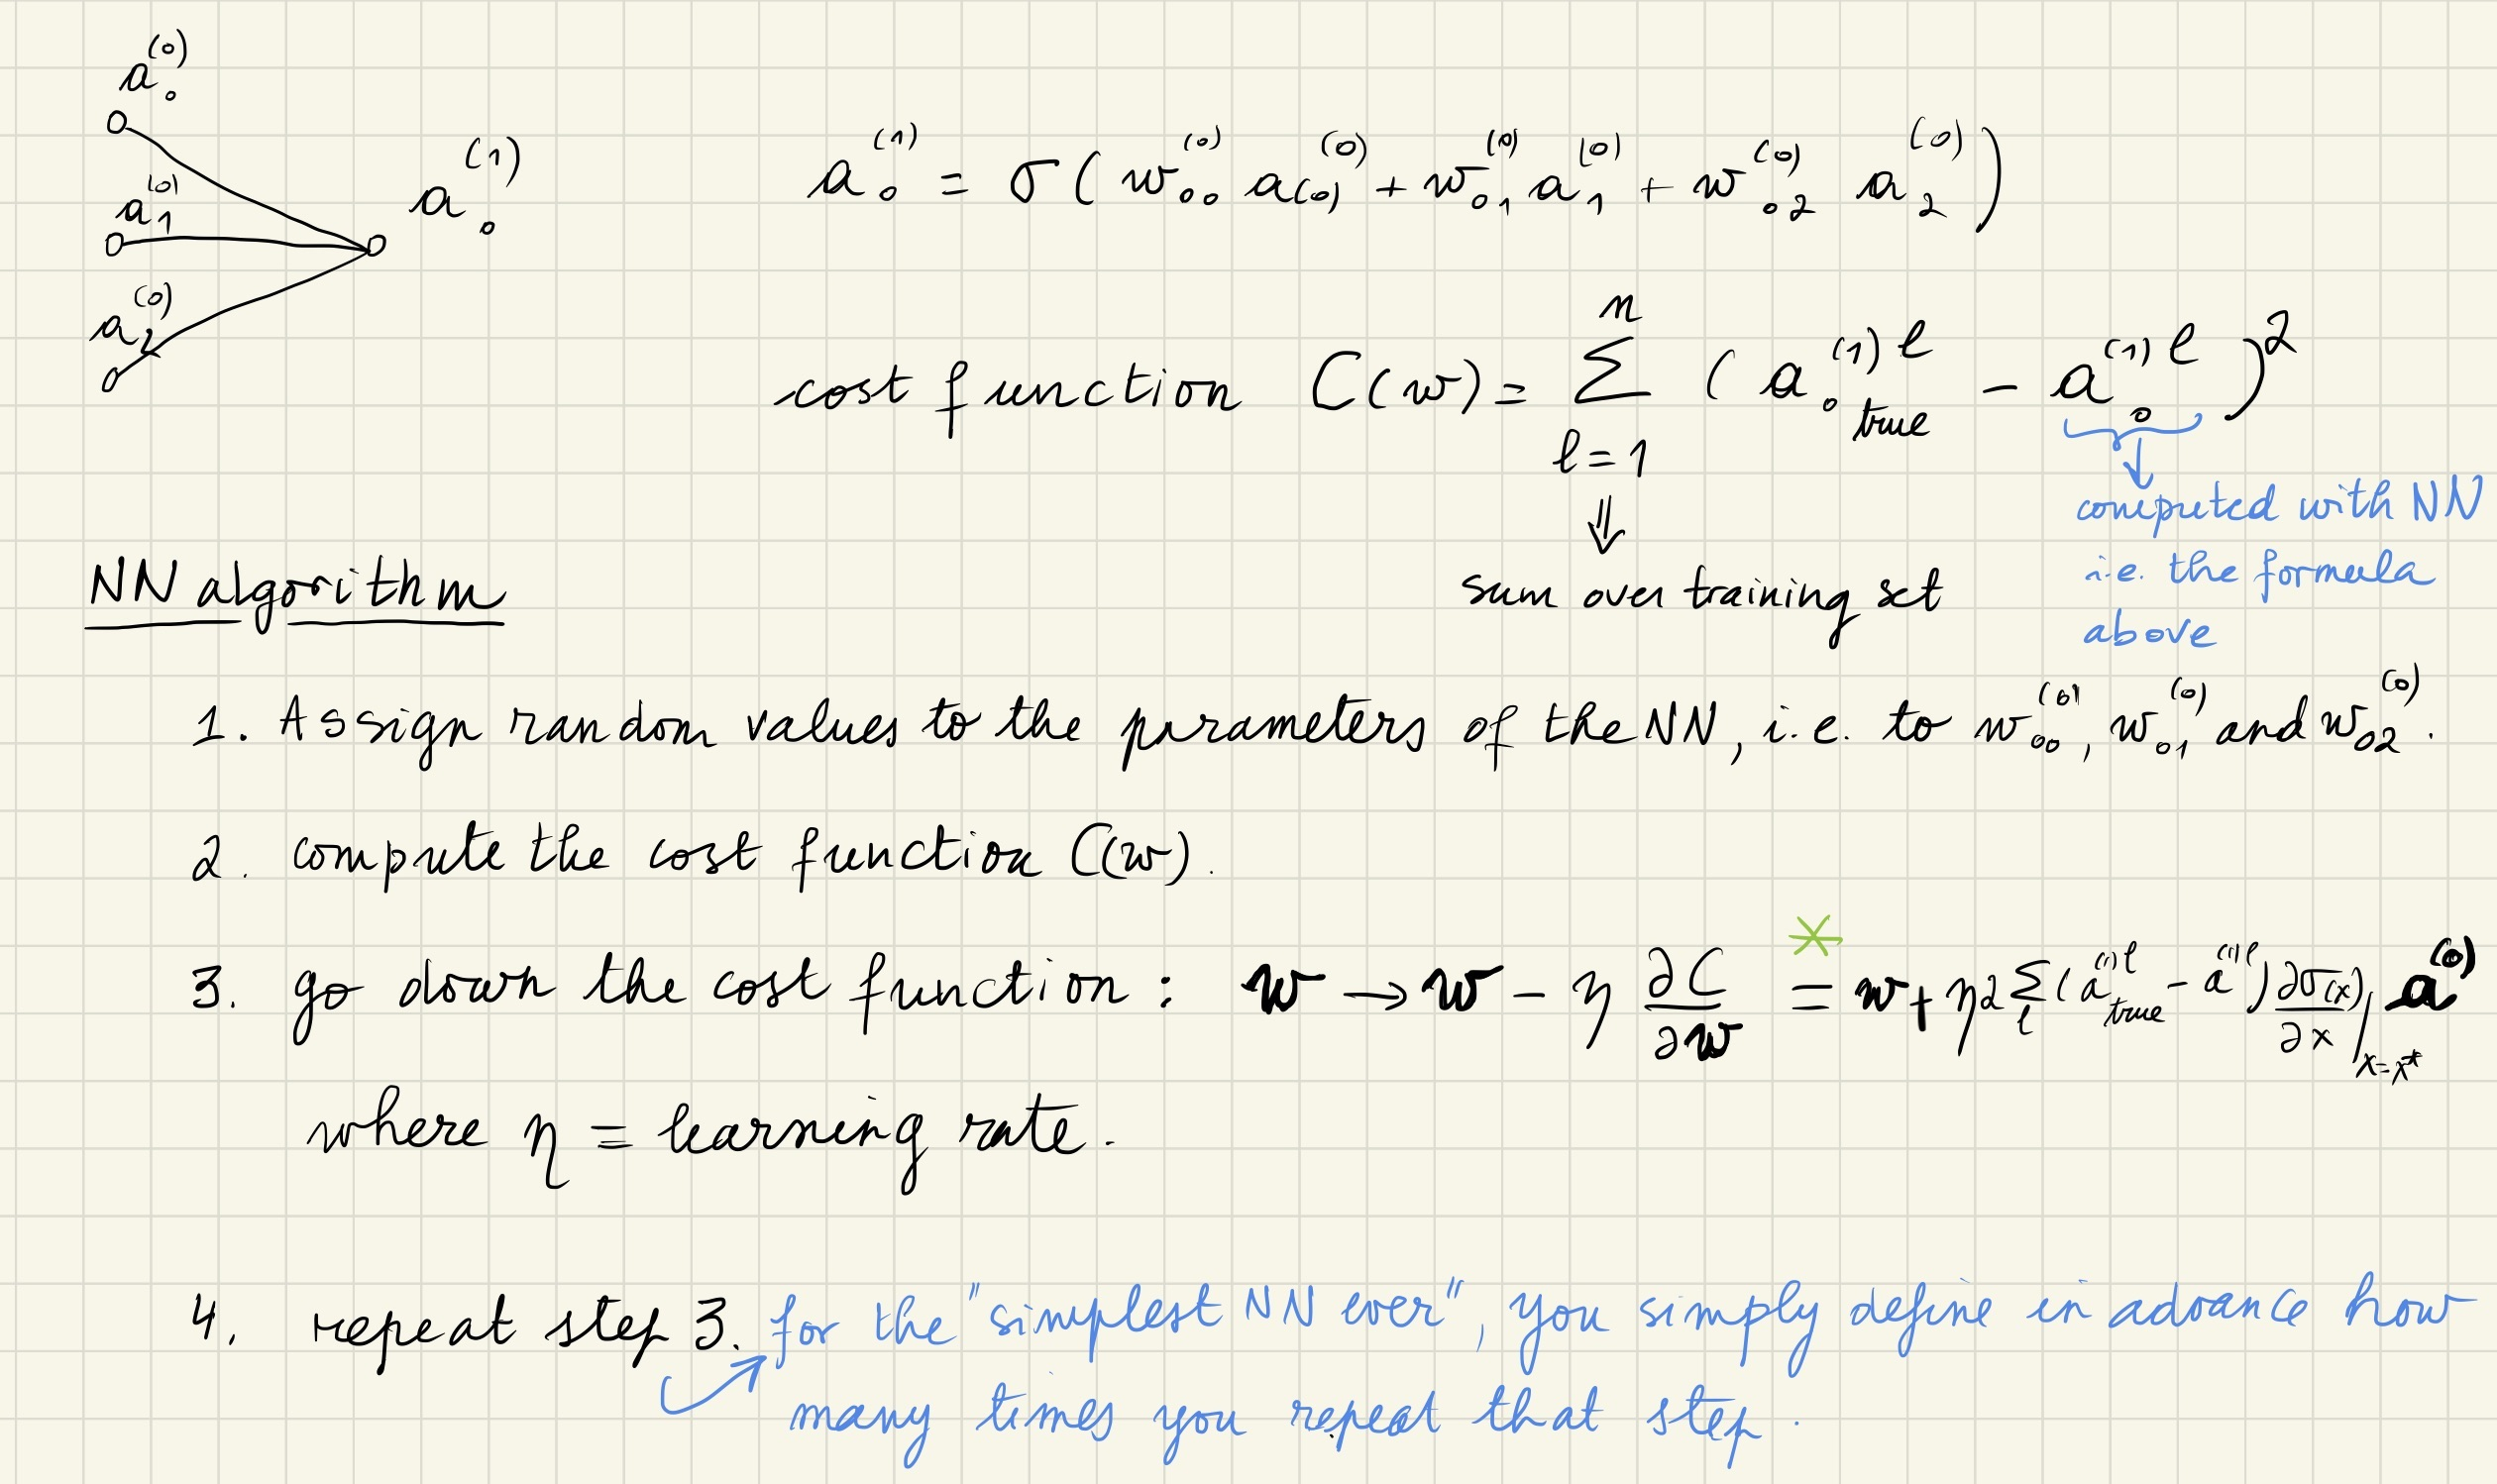

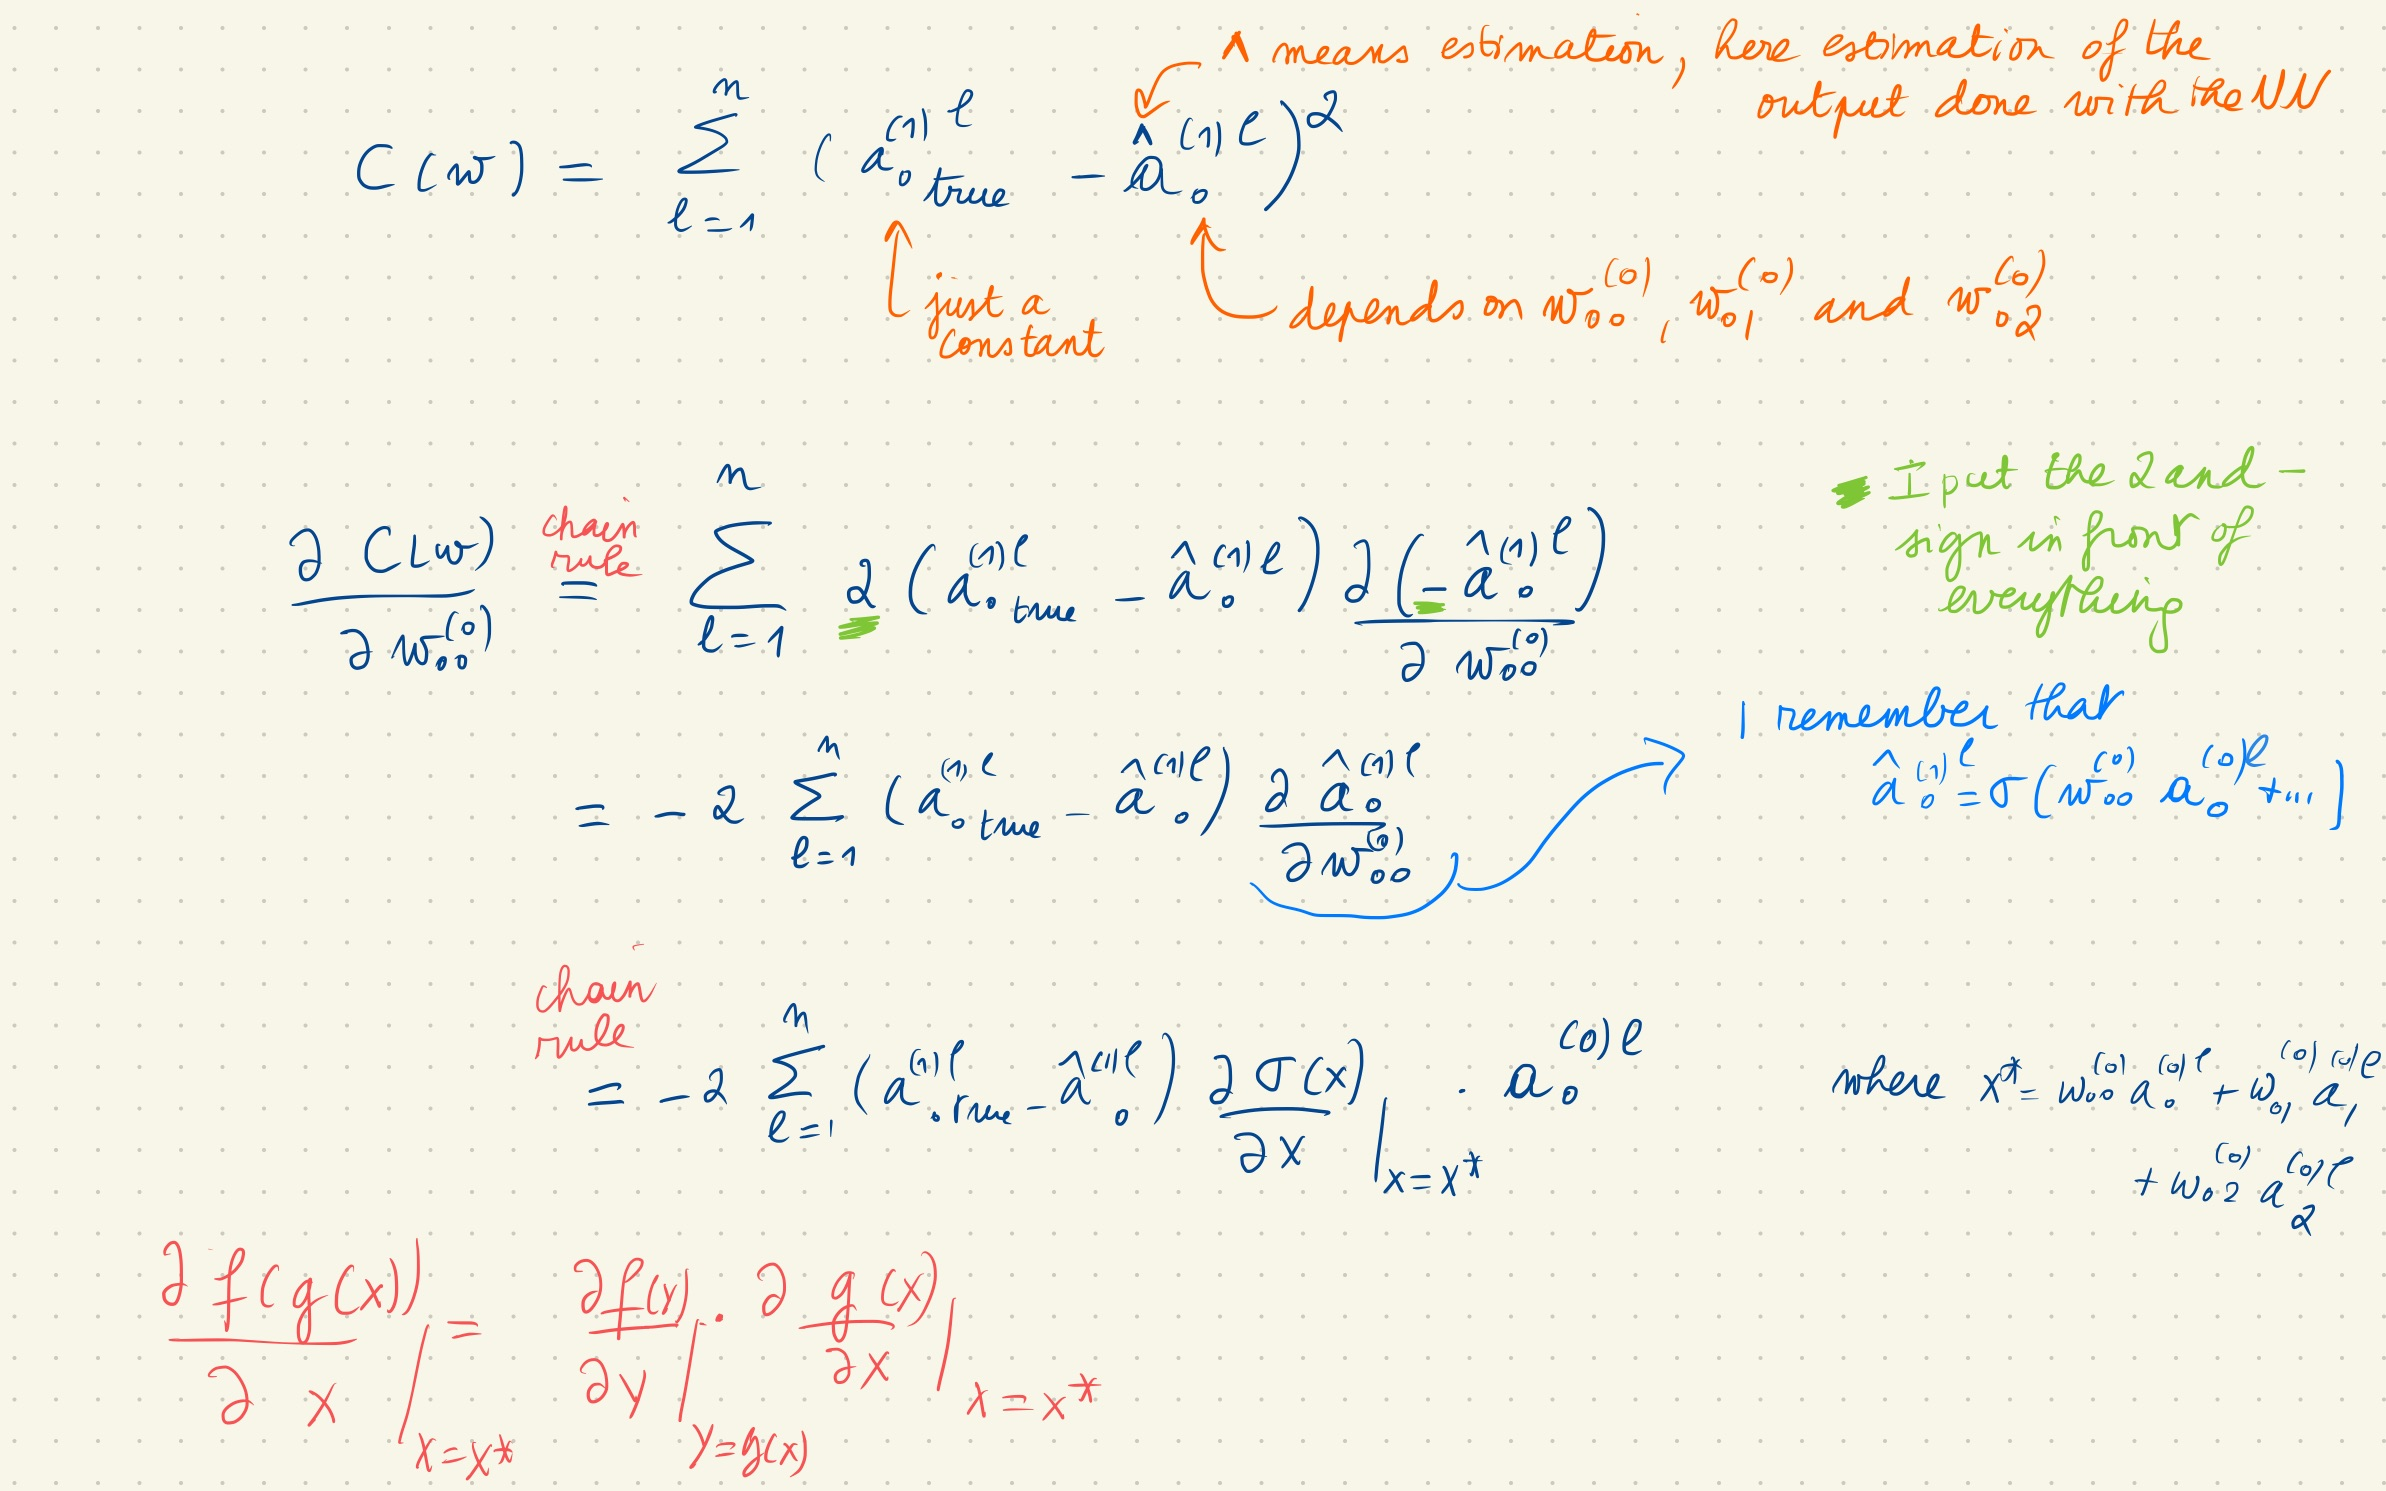

In [146]:
weights = 2 * np.random.random((3, 1)) - 1
a0 = X
print('a0 shape',a0.shape)
a1 = y
eta=.5 #learning rate
print(a1.shape)
for iter in range(1000):
    # forward propagation => this is the formula for a_O^(1) in the first image above. 

    # how much did we miss (a1_hat is our estimation of the result)?- again this is an array containing the errors for all samples

    # compute the gradient of C (multiply how much we missed by the slope of the sigmoid at x* (see slide))

    #print('a1_delta shape',a1_delta.shape)
    # update weights (the dot product is to sum over the whole training set)

    
print('Output After Training:')
print(a1_hat)
print('True output')
print(a1)



a0 shape (4, 3)
(4, 1)
Output After Training:
[[0.0319672 ]
 [0.02575135]
 [0.97910404]
 [0.97402895]]
True output
[[0]
 [0]
 [1]
 [1]]
